In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(8,4)


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/Exercise/height_weight.csv")
df.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.shape

(10000, 3)

Histgram for weights

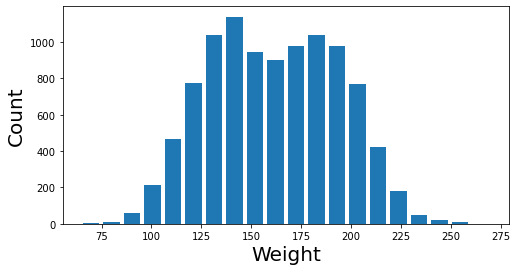

In [4]:
plt.hist(df.weight,bins=20,rwidth=0.8)
plt.xlabel('Weight',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

Histgram for height

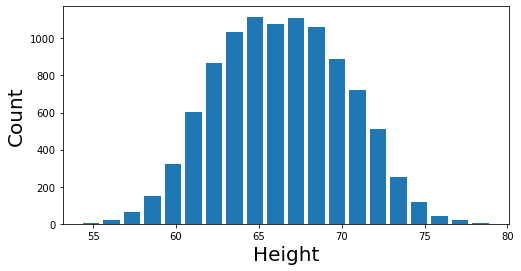

In [5]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

Detect outliers based on weight

In [6]:
Q1 = df.weight.quantile(0.25)
Q3 = df.weight.quantile(0.75)
Q1, Q3

(135.8180513055015, 187.16952486868348)

In [7]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [8]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [9]:
df.weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: weight, dtype: float64

In [10]:
df[(df.weight<lower_limit)|(df.weight>upper_limit)]

,gender,height,weight
2014,Male,78.998742,269.989699


Detect outliers based on height

In [11]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
Q1, Q3

(63.505620481218955, 69.1742617268347)

In [12]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [13]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [14]:
df[(df.height<lower_limit)|(df.height>upper_limit)]

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [15]:
df.shape

(10000, 3)

# Remove Outliers

In [16]:
df = df[(df.height>lower_limit)&(df.height<upper_limit)]
df = df[(df.weight>lower_limit)&(df.weight<upper_limit)]


In [17]:
df.shape

(3, 3)